In [ ]:
import numpy as np
A = np.matrix([[8,7,2,9],
               [1,3,6,3],
               [7,2,0,3],
               [10,3,1,1],
               [8,1,3,4]])
A_array = np.asarray(A)
from sklearn.decomposition import PCA
#определяем метод главных компонент с двумя компонентами
pca = PCA(n_components=0.9)
#обучаем алгоритм на наших данных
principalComponents = pca.fit_transform(A_array)


In [4]:
principalComponents 

array([[ 2.30932461,  5.97129065],
       [-6.87615329,  0.26773147],
       [ 1.12880358, -1.81626914],
       [ 2.98839369, -3.11563871],
       [ 0.44963141, -1.30711427]])

In [6]:
import pandas as pd
A = np.matrix([[8,7,2,9],
               [1,3,6,3],
               [7,2,0,3],
               [10,3,1,1],
               [8,1,3,4]])
 
df = pd.DataFrame(A)
df_std  = (df - df.mean()) / (df.std())
pca = PCA(n_components=0.9)
principalComponents = pca.fit_transform(df_std)
principalComponents

array([[ 1.61145254,  1.76368007, -0.01320928],
       [-2.08441051,  1.01724955,  0.24417084],
       [ 0.29568142, -0.95946326,  0.05272576],
       [ 0.50390826, -1.24373821,  0.50808763],
       [-0.3266317 , -0.57772816, -0.79177495]])

Снижение размерности. Практика

In [8]:
df = pd.read_csv('C:/Users/U_M1P8G/Desktop/IDE/Доп. главы высшей математики/Кластеризация и техники понижения размерности/data/Country-data.csv')
df.head(3)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460


In [9]:
df['life_expec'].max()

np.float64(82.8)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [13]:
df_for_scaling = df.drop('country', axis = 1)
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(df_for_scaling)
X_scaled[0][0]

np.float64(1.2915323778422956)

Строим матрицу корреляций

Матрица корреляций:
            child_mort  exports  health  imports  income  inflation  \
child_mort       1.000   -0.318  -0.200   -0.127  -0.524      0.288   
exports         -0.318    1.000  -0.114    0.737   0.517     -0.107   
health          -0.200   -0.114   1.000    0.096   0.130     -0.255   
imports         -0.127    0.737   0.096    1.000   0.122     -0.247   
income          -0.524    0.517   0.130    0.122   1.000     -0.148   
inflation        0.288   -0.107  -0.255   -0.247  -0.148      1.000   
life_expec      -0.887    0.316   0.211    0.054   0.612     -0.240   
total_fer        0.848   -0.320  -0.197   -0.159  -0.502      0.317   
gdpp            -0.483    0.419   0.346    0.115   0.896     -0.222   

            life_expec  total_fer   gdpp  
child_mort      -0.887      0.848 -0.483  
exports          0.316     -0.320  0.419  
health           0.211     -0.197  0.346  
imports          0.054     -0.159  0.115  
income           0.612     -0.502  0.896  
inflation  

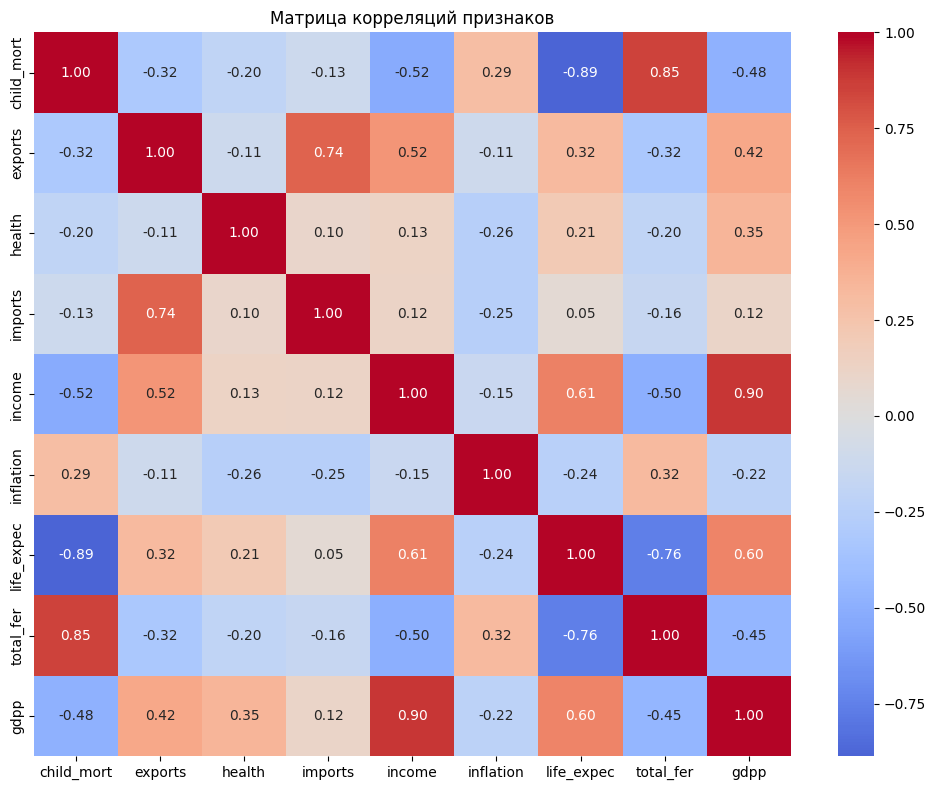

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Создаем DataFrame из масштабированных данных
df_scaled = pd.DataFrame(X_scaled, columns=df_for_scaling.columns)
corr_matrix = df_scaled.corr()
print("Матрица корреляций:")
print(corr_matrix.round(3))

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, 
            annot=True, 
            cmap='coolwarm', 
            center=0,
            fmt='.2f')
plt.title('Матрица корреляций признаков')
plt.tight_layout()
plt.show()


Теперь понизим размерность данных — возьмём для этого метод главных компонент (PCA) как самый простой и популярный.

Найдите минимальное число компонент, которые суммарно могут объяснить как минимум 90 % разброса данных.

In [15]:
pca = PCA(n_components=0.9)
#обучаем алгоритм на наших данных
principalComponents = pca.fit_transform(df_scaled)

In [17]:
variance_first = pca.explained_variance_ratio_[0]
variance_first

np.float64(0.45951739786095896)

Матрица корреляций:
     1    2    3    4    5
1  1.0  0.0  0.0  0.0 -0.0
2  0.0  1.0  0.0  0.0 -0.0
3  0.0  0.0  1.0 -0.0  0.0
4  0.0  0.0 -0.0  1.0  0.0
5 -0.0 -0.0  0.0  0.0  1.0


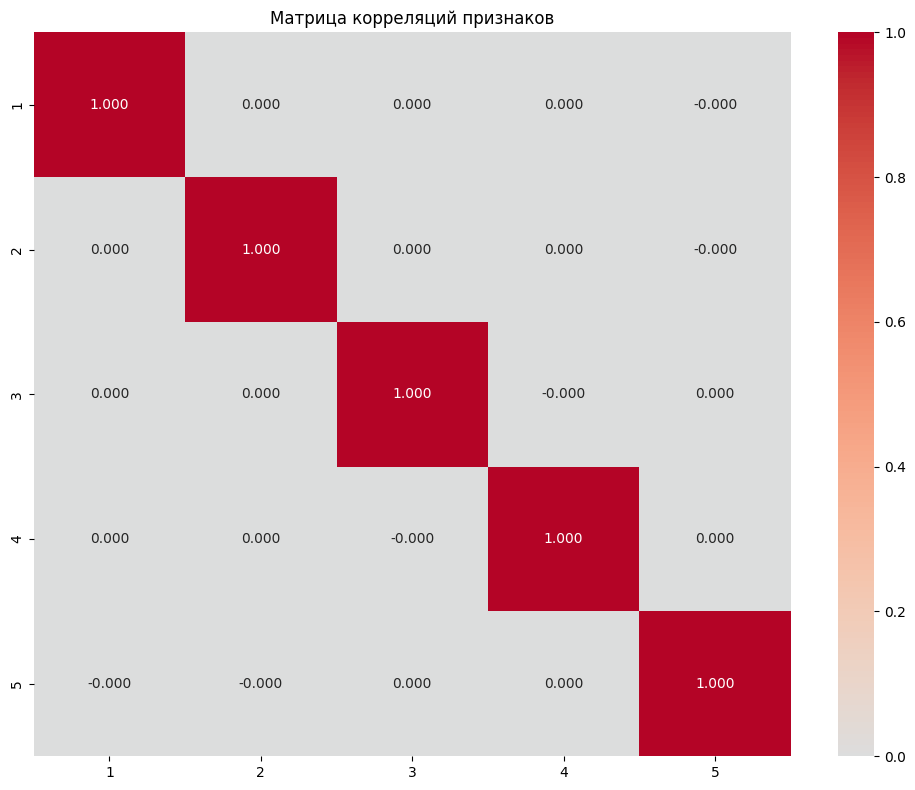

In [20]:
corr_matrix_2 = pd.DataFrame(principalComponents, columns = range(1, 6)).corr()
print("Матрица корреляций:")
print(corr_matrix_2.round(3))

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_2, 
            annot=True, 
            cmap='coolwarm', 
            center=0,
            fmt='.3f')
plt.title('Матрица корреляций признаков')
plt.tight_layout()
plt.show()

Теперь, когда мы уменьшили размерность данных, можно переходить к кластеризации. Подберите оптимальное количество кластеров с помощью коэффициента силуэта, перебирая возможные значения от 2 до 10 включительно. Для кластеризации используйте алгоритм k-means++. В качестве значения параметра random_state возьмите число 1.

In [25]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

n_clusters = range(2, 11)
scores = []

for i in n_clusters:
    model = KMeans(n_clusters = i, random_state=1) 
    model.fit(principalComponents)
    cluster_labels = model.labels_
    score_s = silhouette_score(principalComponents, cluster_labels)
    scores.append({'n_clusters': i, 'silhouette_score': score_s})
df_scores = pd.DataFrame(scores)    
print(df_scores)    
    

   n_clusters  silhouette_score
0           2          0.284940
1           3          0.307977
2           4          0.320414
3           5          0.247967
4           6          0.234871
5           7          0.244125
6           8          0.239855
7           9          0.233192
8          10          0.227594


In [26]:
model = KMeans(n_clusters = 4, random_state=1) 
model.fit(principalComponents)
cluster_labels = model.labels_

In [27]:
df['labels']=cluster_labels
df.head(3)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,3
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,3


In [31]:
# Находим страны с самым высоким показателем детской смертности
max_child_mort = df['child_mort'].max()
countries_high_child_mort = df[df['child_mort'] == max_child_mort]

min_gdpp = df['gdpp'].min()
countries_low_gdpp = df[df['gdpp'] == min_gdpp]

mask = (df['child_mort'] == max_child_mort) | (df['gdpp'] == min_gdpp)
df[mask]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels
26,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231,0
66,Haiti,208.0,15.30,6.91,64.7,1500,5.45,32.1,3.33,662,0


<Axes: xlabel='K-Means_Cluster_ID', ylabel='child_mort'>

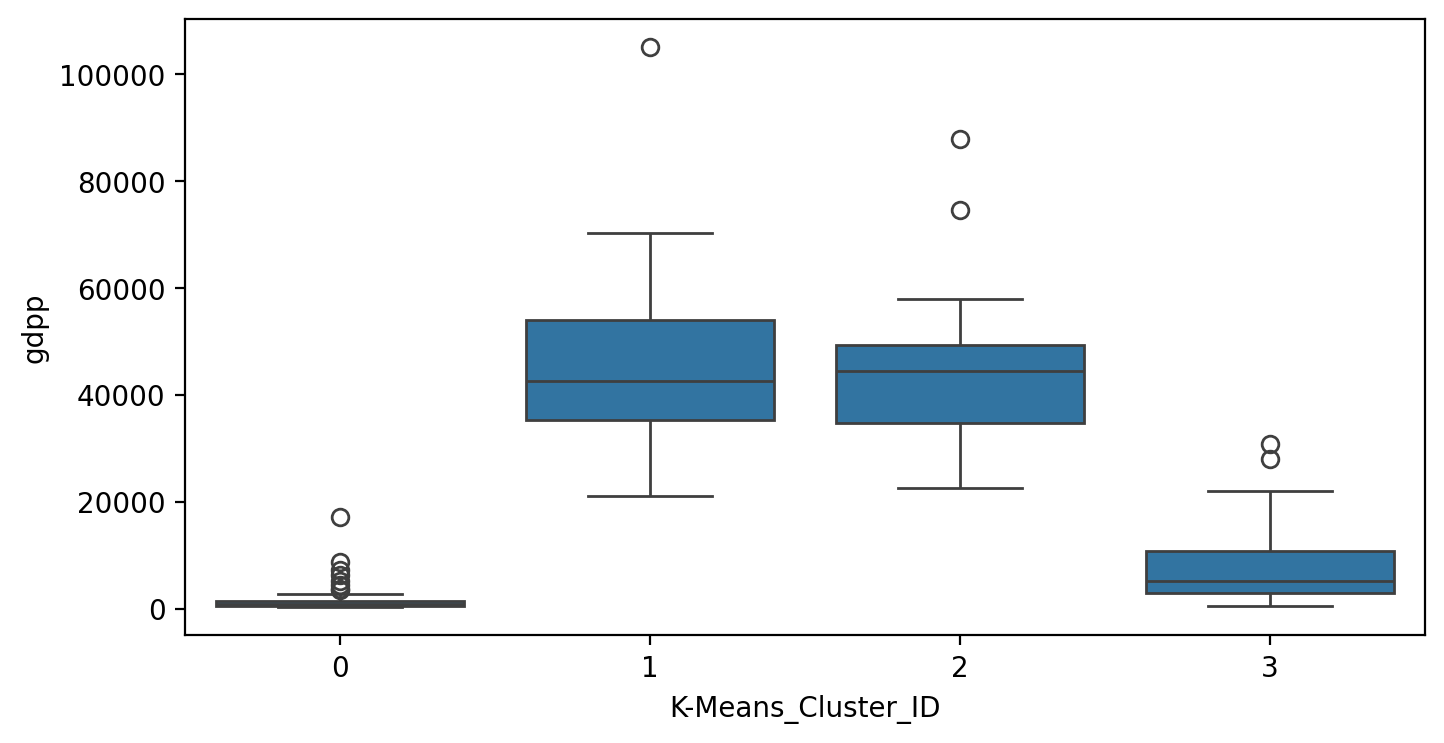

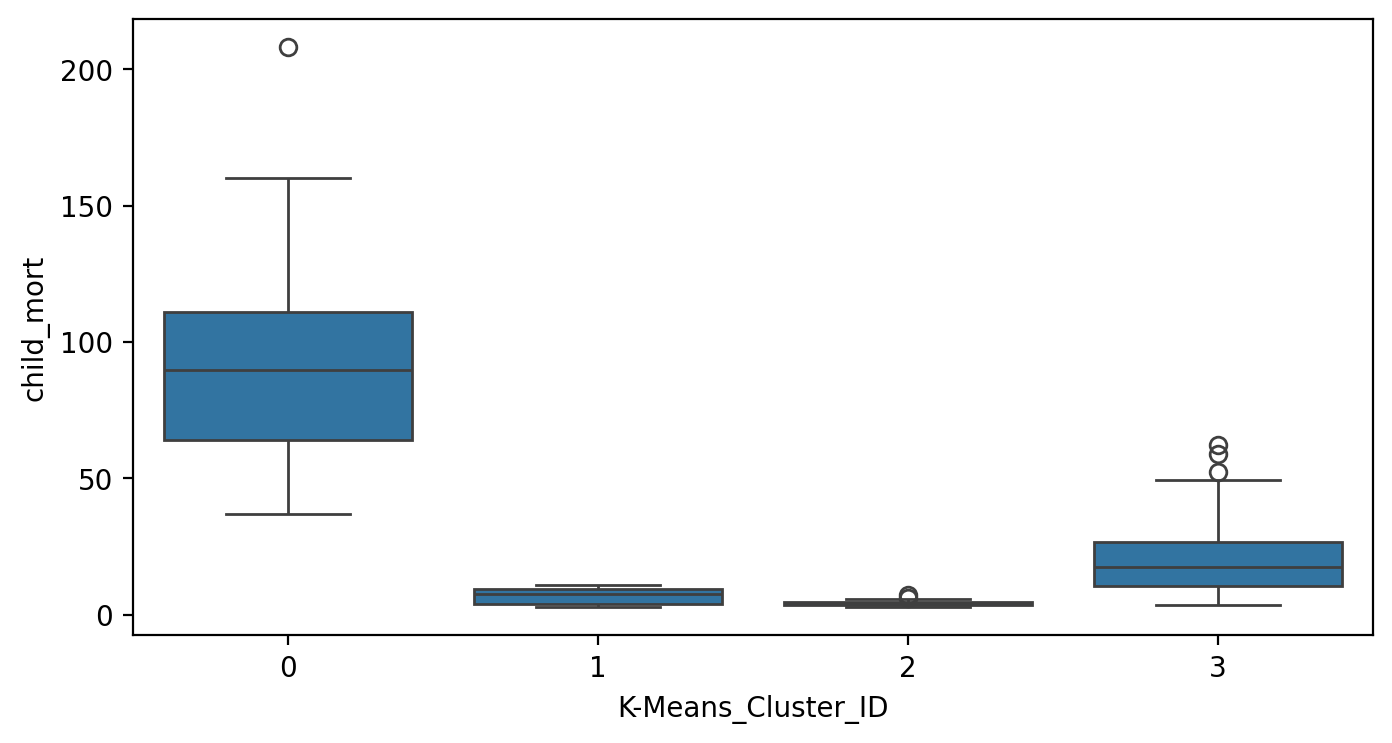

In [32]:
kmeans = KMeans(n_clusters=4, random_state=1)
kmeans.fit(principalComponents)
df['K-Means_Cluster_ID'] = kmeans.labels_
plt.figure(figsize=(8,4),dpi=200)
sns.boxplot(x='K-Means_Cluster_ID', y='gdpp', data=df)
plt.figure(figsize=(8,4),dpi=200)
sns.boxplot(x='K-Means_Cluster_ID', y='child_mort', data=df)

In [34]:
df[df['K-Means_Cluster_ID']==0].sort_values('life_expec')

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels,K-Means_Cluster_ID
66,Haiti,208.0,15.300,6.91,64.7000,1500,5.450,32.1,3.33,662,0,0
87,Lesotho,99.7,39.400,11.10,101.0000,2380,4.150,46.5,3.30,1170,0,0
31,Central African Republic,149.0,11.800,3.98,26.5000,888,2.010,47.5,5.21,446,0,0
166,Zambia,83.1,37.000,5.89,30.9000,3280,14.000,52.0,5.40,1460,0,0
94,Malawi,90.5,22.800,6.59,34.9000,1030,12.100,53.1,5.31,459,0,0
137,South Africa,53.7,28.600,8.94,27.4000,12000,6.350,54.3,2.59,7280,0,0
106,Mozambique,101.0,31.500,5.21,46.2000,918,7.640,54.5,5.56,419,0,0
132,Sierra Leone,160.0,16.800,13.10,34.5000,1220,17.200,55.0,5.20,399,0,0
64,Guinea-Bissau,114.0,14.900,8.50,35.2000,1390,2.970,55.6,5.05,547,0,0
0,Afghanistan,90.2,10.000,7.58,44.9000,1610,9.440,56.2,5.82,553,0,0
